# Visualisation: Chart formatting

By changing settings on the `matplotlib` `Axis` object, or providing arguments to the `pandas` plotting methods, we can can adjust the formatting of plots.

We'll use the same dataset used previously in this course.

In [1]:
# Importing Python packages we are likely to need
import pandas as pd  # data tables
import numpy as np  # numerical operations
import matplotlib.pyplot as plt  # plotting

In [35]:
df = pd.read_csv("~/cf/coding_club/python_club/outputs/data/referrals_by_priority.csv")
df['week_start'] = pd.to_datetime(df['week_start'])
df = df.set_index('week_start')
df.head(3)

,2 Week Wait,Routine,Urgent
week_start,,,
2019-10-31,217570,1050288,167886
2019-11-30,215739,1023472,168726
2019-12-31,209806,1009113,164598


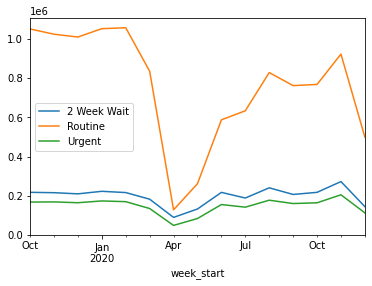

In [3]:
ax = df.plot()

---
## Line colours and styles

Matplotlib lets you specify named colours, like 'red' etc., but can use precise colour codes to match CF branding. In programming languages, colours are represented as *hex codes*. Lots of websites help you find the hex codes for colours you are looking for, e.g.

https://www.w3schools.com/colors/colors_picker.asp

You can also choose line styles:

|Linestyle | Description|
------------|-------------
|'-' or 'solid' | solid line|
|'--' or 'dashed' | dashed line|
|'-.' or 'dashdot' | dash-dotted line|
|':' or 'dotted' | dotted line

You can set colours and styles using the `color` and `style` arguments in the `plot` method. You then provide a list where each entry is the value for the data series you are plotting. Note that the order must be the same as the columns in the dataframe.

    ax = df.plot(color=[cf_cyan, cf_pink, cf_orange], style=['--', ':.', ':'])

In [36]:
cf_teal = '#26a5b8'
cf_pink = '#dd0075'
cf_orange = "#ff9900"
cf_green = '#61B776'
cf_purple = "#612aa1"
cf_yellow = '#ffcc00'

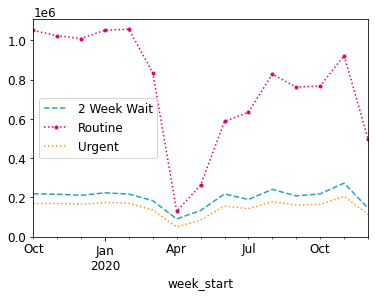

In [37]:
ax = df.plot(color=[cf_teal, cf_pink, cf_orange], style=['--', ':.', ':'])

---
## Legend

#### Changing names
Names can be changed with the `Axis.legend` method. The order of the names should be the same as they appear in the legend, which is the same as the order of the dataframe columns.

    ax.legend(["new_name1", "new_name2", "new_name3"])

#### Legend position
By default, matplotlib puts the legend in the position with minimal overlap of lines on the plot. But CF style requires legends to be at the top right of the plot. The legend position can be changed with the `loc` argument.

    ax.legend(loc='upper right')

#### Legend title
The legend can be given a title with the `title` argument. Sometimes pandas automatically adds a legend title when you don't want one, in which case you can set the title to an empty string.

    ax.legend(title='My legend')

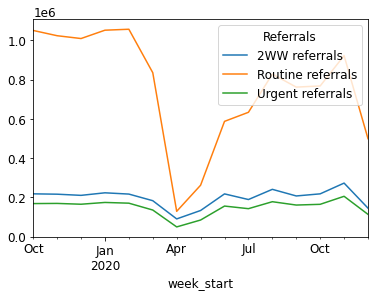

In [15]:
ax = df.plot()
ax.legend(["2WW referrals", "Routine referrals", "Urgent referrals"], 
          loc="upper right", 
          title="Referrals")

## Figure sizing

There are two ways to control the size/shape of your figure.

We can adjust the size of the plot using the `figsize` argument in the `plot` method call, which accepts a list comprising integers representing the width and height for the figure in inches.

    ax = df.plot(figsize=[12, 3])

The `set_xlim` and `set_ylim` methods on `Axis` let you control the points where the axis starts and stops.

    ax.set_ylim([0, 2000000])

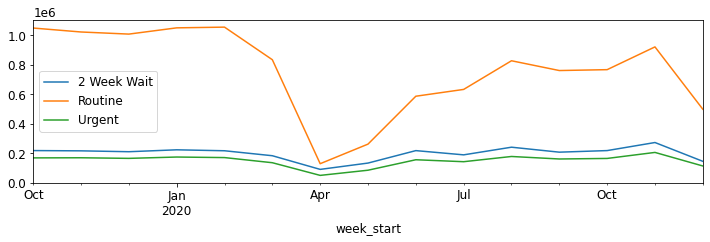

In [19]:
ax = df.plot(figsize=[12, 3])

(597.0, 617.0)

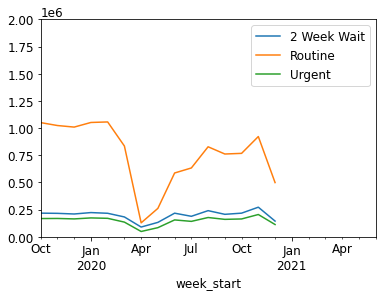

In [28]:
ax = df.plot()
two_million = 2 * 10**6
ax.set_ylim([0, two_million])
ax.set_xlim(['2019-10-01', '2021-06-01'])

---
## Labels

You can set exact values for the points along each axis that are marked by ticks and annotated with tick labels.

    ax.set_yticks([0, 5*10**5, 10**6])

And you can set the tick labels with exact values, which much match the number of ticks:

    ax.set_yticklabels(['apple', 'orange', 'banana'])

[Text(0, 0, '0'), Text(0, 0, '0.5M'), Text(0, 0, '1M')]

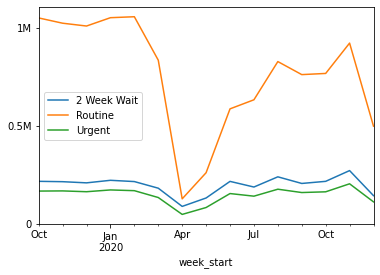

In [7]:
ax = df.plot()
one_million = 10**6
ax.set_yticks([0, one_million/2, one_million])
ax.set_yticklabels(['0', '0.5M', '1M'])

You can set labels for the axes using `set_xlabel` and `set_xlabel` methods. Set them to an empy string if you just want to get rid of them.

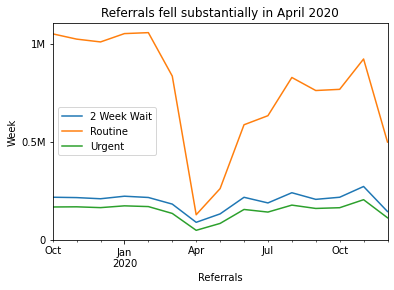

In [8]:
ax.set_xlabel('Referrals')
ax.set_ylabel('Week')
ax.set_title("Referrals fell substantially in April 2020")
display(ax.get_figure())

---
## Fonts

Fonts can't be changed by changing settings on `Axis` objects directly. Instead we can update the settings matplotlib itself.

The matplotlib default font (DejaVu Sans) is sufficiently similar to CF's house style font (Calibri) that you probably won't need to change it. It may be useful to change the size though.

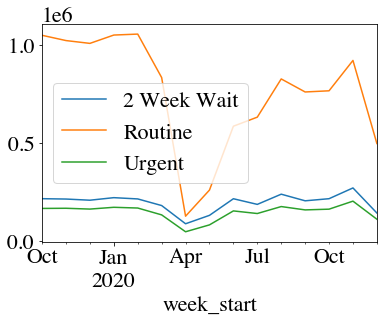

In [38]:
plt.rcParams.update({'font.size': 22, 'font.family': 'Times'})
ax = df.plot()

Remember this is a global setting, so will affect other plots in the notebook. Let's change the fonts back to defaults.

In [39]:
plt.rcParams.update({'font.size': 12, 'font.family': 'DejaVu Sans'})

Text(0.5, 1.0, 'Referrals fell substantially in April 2020, across priority types')

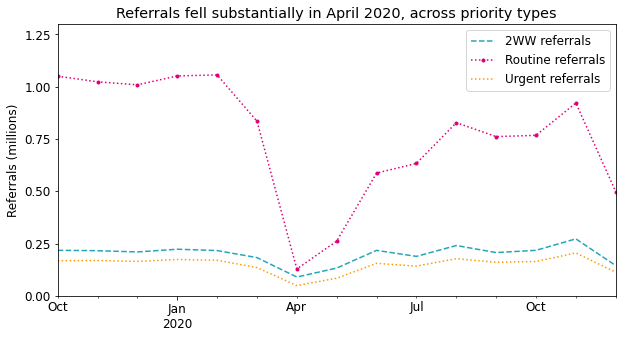

In [71]:
ax = df.plot(color=[cf_teal, cf_pink, cf_orange], 
             style=['--', ':.', ':'],
            figsize=[10, 5])
ax.legend(["2WW referrals", "Routine referrals", "Urgent referrals"], 
          loc="upper right")
ax.set_ylim([0, 1.3 * 10**6])
y_ticks = [0, 0.25, 0.5, 0.75, 1, 1.25]
y_ticks_millions = [x * 10**6 for x in y_ticks]
ax.set_yticks(y_ticks_millions)
ax.set_yticklabels([f'{x:.2f}' for x in y_ticks])
ax.set_xlabel('')
ax.set_ylabel('Referrals (millions)')
ax.set_title('Referrals fell substantially in April 2020, across priority types')